In [10]:
#eaxmples;
#1. predicting mortaity of injured patients
# predicting prob of failure of a product
#likelihood of a customer purchasing particular product, based on his previous purchase

linear regression, the output is the weighted sum of inputs

in logistic regression, we dont output the weighted sum of inputs directly.but we pass through a function that can map any real value between 0 and 1

if we take the weighted sum of inputs as the output as we do in linear regression, the value can be more than 1 but we want a value between 0 and 1.
thats why linear regression cant be used for classification tasks

(-infinite, +infinite) ==> [0,1] ----> Sigmoid function

if p is less than 0.5, then class 0 else class 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:

data = pd.read_csv('marks.txt',header=None,names=['sub1','sub2','op'])
data

,sub1,sub2,op
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [2]:
data.head()

,sub1,sub2,op
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
admitted = data.loc[y==1]
not_admitted = data.loc[y==0]


In [30]:
admitted.shape

(60, 3)

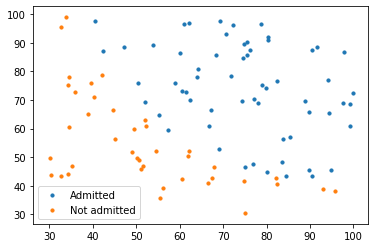

In [36]:
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],s=10, label ='Admitted')
plt.scatter(not_admitted.iloc[:,0], not_admitted.iloc[:,1], s=10, label ='Not admitted')

plt.legend()
plt.show()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#80% training data , 20% test data

In [38]:
regressor = LogisticRegression()
regressor = regressor.fit(x_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_test)

[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1]
26    1
86    0
2     0
55    0
75    1
93    1
16    1
73    1
54    0
95    1
53    0
92    0
78    0
13    1
7     1
30    1
22    0
24    1
33    1
8     1
Name: op, dtype: int64


In [43]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print('accuracy:', metrics.accuracy_score(y_test, y_pred)*100)

accuracy: 95.0


In [44]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is: ', cm, sep='\n')

confusion matrix is: 
[[ 7  1]
 [ 0 12]]


In [45]:
#roc

In [47]:
score=regressor.score(x_test,y_test)
print(score)

0.95


In [48]:
probs = regressor.predict_proba(x_test)
probs

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [49]:
prob_positive=probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('area under the curve:', roc_auc)


area under the curve: 0.9895833333333334


### What is AUC - ROC Curve?
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. 
ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model 
is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s 
and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease 
and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

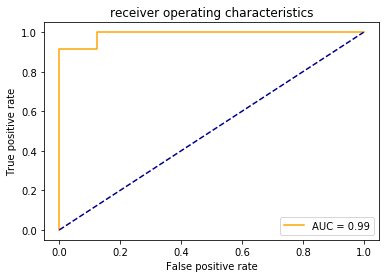

In [50]:
#plot ROC curve

import matplotlib.pyplot as plt
plt.title('receiver operating characteristics')
plt.plot(fpr, tpr, 'orange', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1],color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

### Applications of Logistic Regression
It helps in image segmentation and categorisation.
Generally, we use logistic regression in geographic image processing.
It helps in handwriting recognition.
We use logistic regression in healthcare. That is an application area of logistic regression.